## 准备数据

创建随机的两组数据：

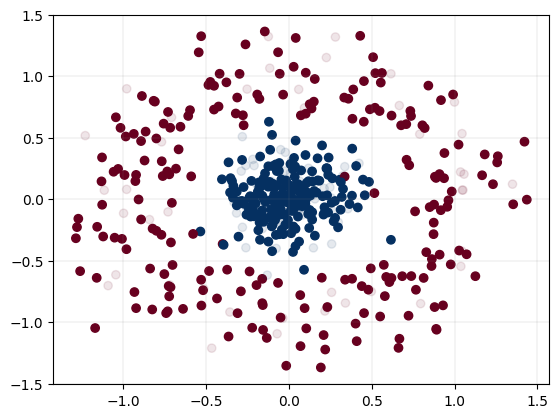

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

def load_data(test_size_perc):
    size = 500
    test_size = int(size * test_size_perc)
    X, y = make_circles(size, factor=.1, noise=.2)
    X_train = X[:-test_size]
    y_train = 2 * y[:-test_size] - 1 # convert to 1 or -1
    X_test = X[-test_size:]
    y_test = 2 * y[-test_size:] - 1 # convert to 1 or -1
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_data(0.2)

# Plotting the training set
fig, ax = plt.subplots()
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdBu')
ax.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.1, cmap='RdBu')

## 训练模型

`sklearn`的SVM模型提供了多种可选择的核函数，以实现非线性支持向量机。这里我们采用多项式核函数：

In [2]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

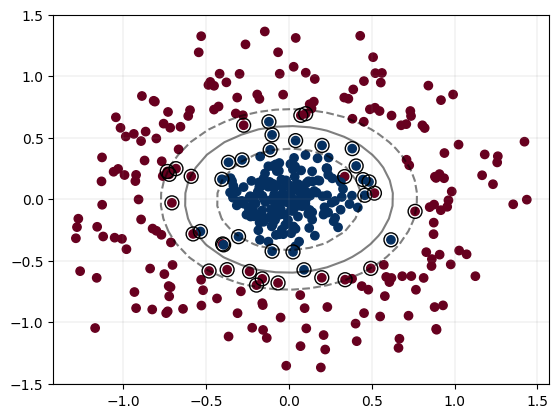

In [3]:
import numpy as np

def plot_svc_decision_function(model, ax):
    """绘制2D SVC图像函数"""
    assert ax is not None
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建网格来展示数据
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # 超平面S在坐标(x,y)下对应的值
    P = model.decision_function(xy).reshape(X.shape)

    # 绘制边界和间距，即超平面S的等高线：f(x,y)=0, f(x,y)=1, f(x,y)=-1
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # 绘制支持向量
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, edgecolors='k', facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


fig, ax = plt.subplots()
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdBu')

plot_svc_decision_function(model, ax)

## 测试模型



In [4]:
from sklearn.metrics import accuracy_score
predictions_poly = model.predict(X_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("SVM 2nd degree polynomial kernel accuracy: " + str(accuracy_poly))

SVM 2nd degree polynomial kernel accuracy: 0.99
